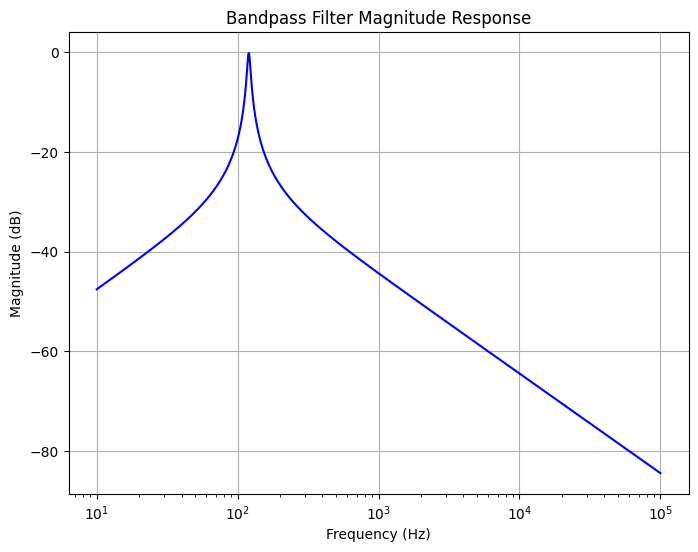

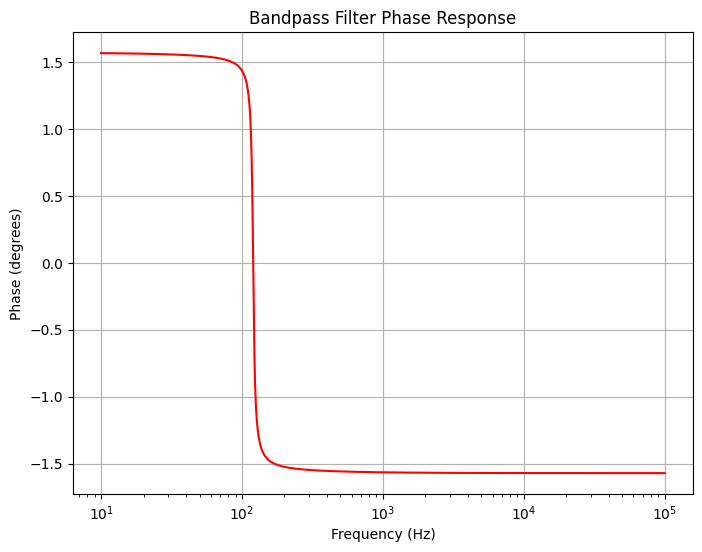

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqs

# Parameters
K0 = 1.0       # Overall gain
fc = 120.0    # Center frequency in Hz
Q  = 20.0       # Quality factor

# Define numerator and denominator of the transfer function H(s)
b0 = K0 * (2 * np.pi * fc) / Q
num = [b0, 0]
den = [1, (2 * np.pi * fc)/Q, (2 * np.pi * fc)**2]

# 1) Define frequency range in Hz
f_min = 10      # 10 Hz
f_max = 1e5     # 100 kHz
num_points = 1000
f = np.logspace(np.log10(f_min), np.log10(f_max), num_points)  # in Hz

# 2) Convert f (Hz) to w (rad/s)
w = 2 * np.pi * f

# 3) Use freqs to get the frequency response
w, H = freqs(num, den, w)

# Convert magnitude to dB
mag_db = 20 * np.log10(np.abs(H))
# Phase in degrees
phase_deg = np.angle(H, deg=False)

# 4) Plot with frequency in Hz (f on the x-axis)
plt.figure(figsize=(8, 6))
plt.semilogx(f, mag_db, 'b')
plt.title('Bandpass Filter Magnitude Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)

plt.figure(figsize=(8, 6))
plt.semilogx(f, phase_deg, 'r')
plt.title('Bandpass Filter Phase Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (degrees)')
plt.grid(True)

plt.show()


# Calculate filter coefficients

Digital numerator coefficients (b): [ 0.00791349  0.         -0.00791349]
Digital denominator coefficients (a): [ 1.         -1.98316279  0.98417301]
Code: feedbackFilter2.setCoefficients(-1.9831627883306575, 0.9841730120573678, 0.007913493971316065, 0.0, -0.007913493971316065);


/var/folders/lg/9twk84311llgwk38_815qyv80000gp/T/ipykernel_92080/2912614441.py:29: RuntimeWarning: divide by zero encountered in log10
  magnitude_dB = 20 * np.log10(np.abs(h))


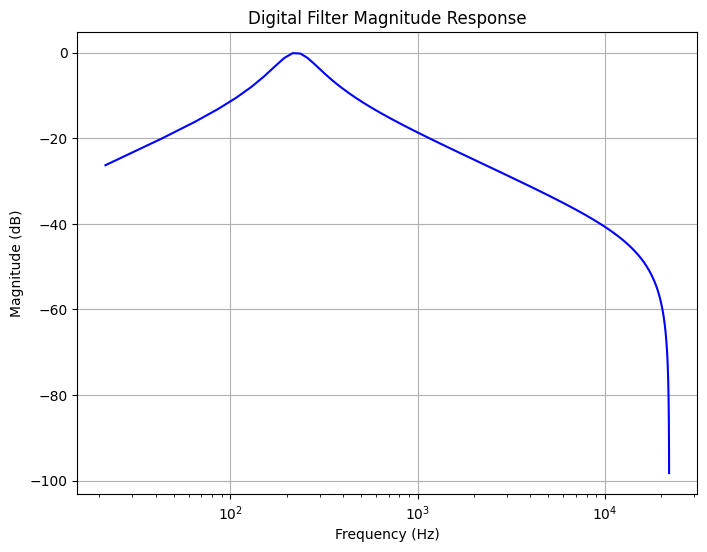

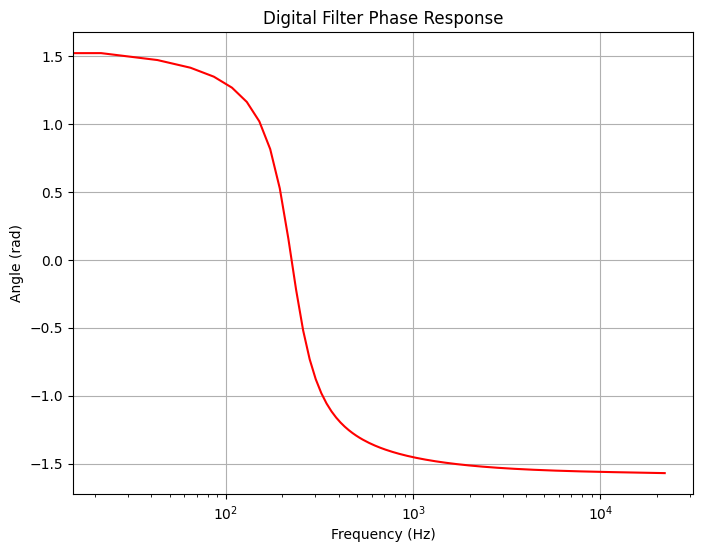

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, bilinear

# Define your parameters
K0 = 1.0       # Gain
fc = 224.0    # Center frequency in Hz
Q  = 2.0       # Quality factor
fs = 44100.0   # Sampling frequency in Hz

# Analog filter coefficients:
# Numerator: K0 * (2*pi*fc/Q) * s  --> [K0*(2*pi*fc)/Q, 0]
# Denominator: s^2 + (2*pi*fc/Q)*s + (2*pi*fc)^2  --> [1, (2*pi*fc)/Q, (2*pi*fc)**2]
b_analog = [K0 * (2 * np.pi * fc) / Q, 0]
a_analog = [1, (2 * np.pi * fc) / Q, (2 * np.pi * fc)**2]

# Convert to digital filter coefficients using the bilinear transform
b_digital, a_digital = bilinear(b_analog, a_analog, fs)

# Compute the frequency response of the digital filter
# freqz returns frequency (w) in rad/sample and the complex frequency response (h)
w, h = freqz(b_digital, a_digital, worN=1024)

# Convert frequency to Hz: f = (w / (2*pi)) * fs; but since w is in rad/sample,
# we can directly compute frequency in Hz as:
f = w * fs / (2 * np.pi)

# Compute magnitude in dB and phase in degrees
magnitude_dB = 20 * np.log10(np.abs(h))
phase_rad = np.angle(h, deg=False)

print("Digital numerator coefficients (b):", b_digital)
print("Digital denominator coefficients (a):", a_digital)
print(f"Code: feedbackFilter2.setCoefficients({a_digital[1]}, {a_digital[2]}, {b_digital[0]}, {b_digital[1]}, {b_digital[2]});")

# Plot magnitude response
plt.figure(figsize=(8, 6))
plt.semilogx(f, magnitude_dB, 'b')
plt.title('Digital Filter Magnitude Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)

# Plot phase response
plt.figure(figsize=(8, 6))
plt.semilogx(f, phase_rad, 'r')
plt.title('Digital Filter Phase Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Angle (rad)')
plt.grid(True)

plt.show()
